In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
target = ['poi','name']
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']
email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
print('financial features %d, email features %d '%(len(financial_features), len(email_features)))

financial features 14, email features 6 


In [56]:
# Load dict data 
data = pd.read_csv('raw_data.csv')
data.shape

(146, 22)

In [57]:
data.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
name                          object
dtype: object

In [58]:
### Convert bool type to int64
data.poi = data.poi.astype('int64', copy=False)
data.head(10)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,152.0,0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
1,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0,BADUM JAMES P
2,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,864523.0,0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
3,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,2660303.0,0,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C
4,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,69.0,0,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0,BAY FRANKLIN R
5,NaN,684694.0,NaN,NaN,NaN,1599641.0,NaN,NaN,NaN,NaN,...,874.0,0,NaN,NaN,80818.0,NaN,NaN,860136.0,1599641.0,BAZELIDES PHILIP J
6,700000.0,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172.0,4343.0,144.0,386.0,...,566.0,0,126027.0,NaN,231330.0,2639.0,7315.0,969068.0,126027.0,BECK SALLY W
7,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,210698.0,1,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0,BELDEN TIMOTHY N
8,NaN,-102500.0,NaN,3285.0,NaN,3285.0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,44093.0,NaN,NaN,NaN,102500.0,-44093.0,BELFER ROBERT
9,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396.0,11892.0,NaN,NaN,NaN,...,NaN,0,869220.0,NaN,216582.0,NaN,NaN,228474.0,2493616.0,BERBERIAN DAVID


### Check unique value count for target


In [59]:
for col in target:
    print('target [%s] has %s unique value'%(col, len(data[col].unique())))

# Positive and negitive target counts
pos = data.poi.sum()
neg = data.shape[0] - pos
print(20*'*')
print('Totally %d positive target, and %d negitive target!'%(pos, neg))

target [poi] has 2 unique value
target [name] has 146 unique value
********************
Totally 18 positive target, and 128 negitive target!


### Check missing value

In [60]:
#check missing values
missing = data.apply(lambda x: sum(x.isnull()))
missing.sort_values()

name                           0
poi                            0
total_stock_value             20
total_payments                21
email_address                 35
restricted_stock              36
exercised_stock_options       44
expenses                      51
salary                        51
other                         53
to_messages                   60
shared_receipt_with_poi       60
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
bonus                         64
long_term_incentive           80
deferred_income               97
deferral_payments            107
restricted_stock_deferred    128
director_fees                129
loan_advances                142
dtype: int64

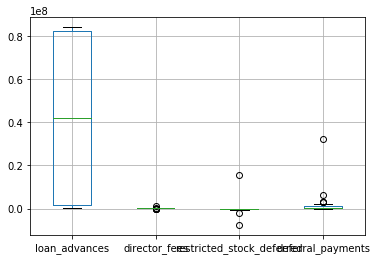

In [61]:
columns_to_decrete = ['loan_advances', 'director_fees', 'restricted_stock_deferred', 'deferral_payments']
data.boxplot(column=columns_to_decrete, return_type='axes')

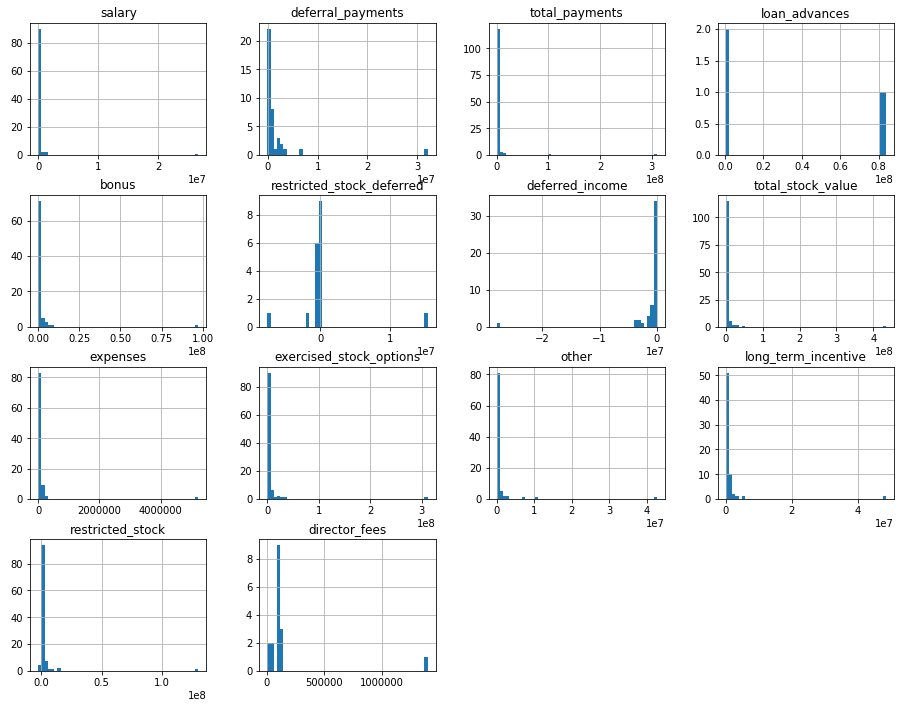

In [64]:
### plot hist of a group of features
def plot_hist(features, title='Finantial features'):
    N = np.int(np.ceil(np.sqrt(len(features))))
    fig, big_axes = plt.subplots(figsize=(20.0, 15.0) , nrows=2, ncols=1, sharey=True)
    for row, big_ax in enumerate(big_axes, start=1):
        # Turn off axis lines and ticks of the big subplot 
        # obs alpha is 0 in RGBA string!
        big_ax.tick_params(labelcolor=(0,0,0,0), top='off', bottom='off', left='off', right='off')
        # removes the white frame
        big_ax._frameon = False
    for i, feat in enumerate(features):
        ax = fig.add_subplot(N, N, i+1)
        plt.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8)
        data.hist(ax=ax, column=feat, bins=50)
plot_hist(financial_features)

In [24]:
for col in columns_to_decrete:
    data[col] = data[col].apply(lambda x: 0 if pd.isnull(x) else 1)

In [25]:
data.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,source
0,4175000.0,1,-3081055.0,1,1729541.0,13868.0,2195.0,47.0,65.0,1,...,152.0,0,126027.0,1,201955.0,1407.0,2902.0,4484442.0,1729541.0,test
1,0.0,1,0.0,1,257817.0,3486.0,0.0,0.0,0.0,1,...,0.0,0,0.0,1,0.0,0.0,0.0,182466.0,257817.0,train
2,0.0,1,-5104.0,1,4046157.0,56301.0,29.0,39.0,0.0,1,...,864523.0,0,1757552.0,1,477.0,465.0,566.0,916197.0,5243487.0,train
3,1200000.0,1,-1386055.0,1,6680544.0,11200.0,0.0,0.0,0.0,1,...,2660303.0,0,3942714.0,1,267102.0,0.0,0.0,5634343.0,10623258.0,train
4,400000.0,1,-201641.0,1,0.0,129142.0,0.0,0.0,0.0,1,...,69.0,0,145796.0,1,239671.0,0.0,0.0,827696.0,63014.0,test


### Fill missing data
    

In [10]:
data = data.fillna(0.0)
data.head(10)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
0,4175000.0,2869717.0,-3081055.0,0.0,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,152.0,0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
1,0.0,178980.0,0.0,0.0,0,257817.0,3486.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0,BADUM JAMES P
2,0.0,0.0,-5104.0,0.0,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,864523.0,0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
3,1200000.0,1295738.0,-1386055.0,0.0,0,6680544.0,11200.0,0.0,0.0,0.0,...,2660303.0,0,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0,BAXTER JOHN C
4,400000.0,260455.0,-201641.0,0.0,frank.bay@enron.com,0.0,129142.0,0.0,0.0,0.0,...,69.0,0,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0,BAY FRANKLIN R
5,0.0,684694.0,0.0,0.0,0,1599641.0,0.0,0.0,0.0,0.0,...,874.0,0,0.0,0.0,80818.0,0.0,0.0,860136.0,1599641.0,BAZELIDES PHILIP J
6,700000.0,0.0,0.0,0.0,sally.beck@enron.com,0.0,37172.0,4343.0,144.0,386.0,...,566.0,0,126027.0,0.0,231330.0,2639.0,7315.0,969068.0,126027.0,BECK SALLY W
7,5249999.0,2144013.0,-2334434.0,0.0,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,210698.0,1,157569.0,0.0,213999.0,5521.0,7991.0,5501630.0,1110705.0,BELDEN TIMOTHY N
8,0.0,-102500.0,0.0,3285.0,0,3285.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,44093.0,0.0,0.0,0.0,102500.0,-44093.0,BELFER ROBERT
9,0.0,0.0,0.0,0.0,david.berberian@enron.com,1624396.0,11892.0,0.0,0.0,0.0,...,0.0,0,869220.0,0.0,216582.0,0.0,0.0,228474.0,2493616.0,BERBERIAN DAVID


### Drop name, email_address

In [11]:
# Since name and email_address won't give much info, just drop them.
data.drop(['name', 'email_address'], axis=1, inplace=True)

### Train and test datasets splitting

In [12]:
np.random.seed(123)
n_samples = data.shape[0]
test_percentile = 0.3
choice = np.random.choice(n_samples, size=int(test_percentile * n_samples), replace=False)
data['source'] = 'train'
data.loc[choice, 'source'] = 'test' # Not recommend use data['source][choice] = 'test'
data.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,source
0,4175000.0,2869717.0,-3081055.0,0.0,1729541.0,13868.0,2195.0,47.0,65.0,0.0,...,152.0,0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,test
1,0.0,178980.0,0.0,0.0,257817.0,3486.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,182466.0,257817.0,train
2,0.0,0.0,-5104.0,0.0,4046157.0,56301.0,29.0,39.0,0.0,0.0,...,864523.0,0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,train
3,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,0.0,...,2660303.0,0,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0,train
4,400000.0,260455.0,-201641.0,0.0,0.0,129142.0,0.0,0.0,0.0,0.0,...,69.0,0,145796.0,-82782.0,239671.0,0.0,0.0,827696.0,63014.0,test


In [13]:
train_dataset = data.loc[data.source == 'train'].copy()
test_dataset = data.loc[data.source == 'test'].copy()

In [14]:
train_dataset.drop('source', axis=1, inplace=True)
test_dataset.drop(['source'], axis=1, inplace=True)

### Save train&test datasets to csv

In [15]:
train_dataset.to_csv('train_modified.csv', index=False)
test_dataset.to_csv('test_modified.csv', index=False)
train_dataset.shape, test_dataset.shape

((103, 20), (43, 20))